# Lecture 2: Reading and Processing e-CALLISTO data

In [15]:
import matplotlib
matplotlib.use('agg') # Disables interactive plot outputs
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## files access 3 different methods

- 2.1 save FIT-file(s) in the local folder, the same as the location of the Python script -> localaccess.py
     play with  color-table, fontsize, check other FIT-files from the archive
- 2.2 save FIT-file(s) in a separate local folder, not the same as the Python script -> sepaccess.py
     Do not forget to adjust your path-description. Download another FIT-file and play with image-size and color-map
- 2.3 access FIT-file(s) directly from website at central server -> webaccess.py
     Try another FIT-file from the archive, e.g. from Kazakhstan.

## Reading from FITS Files

FITS is a ‘flexible image transport system’, that is most commonly used in astronomy because of its utility in transmission, storage and processing of digital images and files. Since, FITS is designed specifically for scientific data, it offers the ability to describe information such as calibration parameters, data origin and metadata.

In this tutorial we will learn to use Astropy IO module named fits to read and write astronomical images and data tables.
###  Opening a FITS file
Once the astropy.io.fits package is loaded using the standard convention, we can open an existing FITS file:

In [2]:
import astropy.io.fits as pyfits

myfile = '../Lectures/Lecture_2/localaccess/BIR_20110809_080000_59.fit.gz'
hdu   = pyfits.open(myfile)

In [3]:
hdu.info()

Filename: ../Lectures/Lecture_2/localaccess/BIR_20110809_080000_59.fit.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (3600, 200)   uint8   
  1                1 BinTableHDU     16   1R x 2C   [3600D8.3, 200D8.3]   


### Header
The Header is also an important component. The info above tells us it has 41 cards:

In [4]:
hdu_phdr= hdu[0].header
hdu_phdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3600 / length of data axis 1                          
NAXIS2  =                  200 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT = 'Warning: the value of CDELT1 may be rounded!'                        
COMMENT = 'Warning: the frequency axis may not be regular!'                     
COMMENT = 'Warning: the value of CDELT2 may be rounded!'                        
COMMENT = 'FITS Definition document #100 and other FITS information'            
DATE    = '2011-08-09'         / Time of observation                            
CONTENT = '2011/08/09  Radio flux density, e-CALLISTO (BIR)' / Title of image   
ORIGIN  = 'Birr_Castle_Irela

In [5]:
Im_title= hdu_phdr['CONTENT']
Im_title

'2011/08/09  Radio flux density, e-CALLISTO (BIR)'

In [6]:
print 'Observation started at %s TU and ended %s TU'% (hdu_phdr['TIME-OBS'], hdu_phdr['TIME-END'])

Observation started at 08:00:00.483 TU and ended 08:15:00 TU


### Data

Generally the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu.

In [10]:
data  = hdu[0].data.astype(np.float32)
data

array([[ 162.,  162.,  163., ...,  160.,  164.,  165.],
       [ 170.,  165.,  170., ...,  166.,  172.,  171.],
       [ 159.,  158.,  160., ...,  157.,  159.,  159.],
       ..., 
       [ 106.,  106.,  106., ...,  102.,  102.,  102.],
       [ 118.,  119.,  118., ...,  111.,  111.,  112.],
       [ 131.,  131.,  132., ...,  131.,  130.,  133.]], dtype=float32)

In [11]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                30400 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = '3600D8.3'           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'FREQUENCY'          / label for field   2                            
TFORM2  = '200D8.3 '           / data format of field: 8-byte DOUBLE            
TSCAL1  =                   

In [12]:
freqs = hdu[1].data['Frequency'][0] # extract frequency axis
time  = hdu[1].data['Time'][0] # extract time axis
hdu.close()

### Display the data

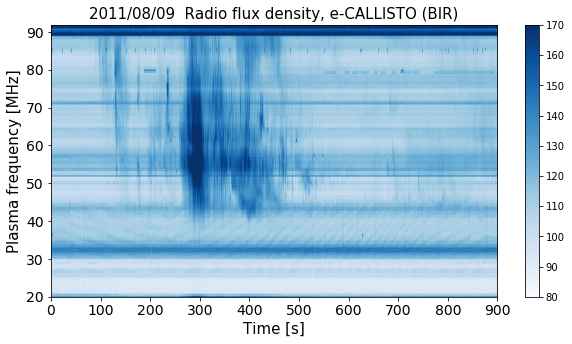

In [16]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
extent = (time[0], time[-1], freqs[-1], freqs[0])
plt.imshow(data, aspect = 'auto', extent = extent, cmap='Blues', vmin=80,vmax=170)
# cm.PRGn, cm.hot, cm.cool, cm.bone, cm.binary, cm.spectral, cm.jet, cm.inferno
# cm.gnuplot, cm.gnuplot2, cm.CMRmap, cm.plasma, cm.magma
plt.tick_params(labelsize=14)
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Plasma frequency [MHz]',fontsize=15)
plt.title(Im_title, fontsize=15)
plt.colorbar()
plt.savefig(myfile + ".png")

### Getting basic statistics


In [17]:
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))

('Min:', 91.0)
('Max:', 192.0)
('Mean:', 119.05672)
('Stdev:', 16.271713)


In [18]:
data = data - np.mean(data)

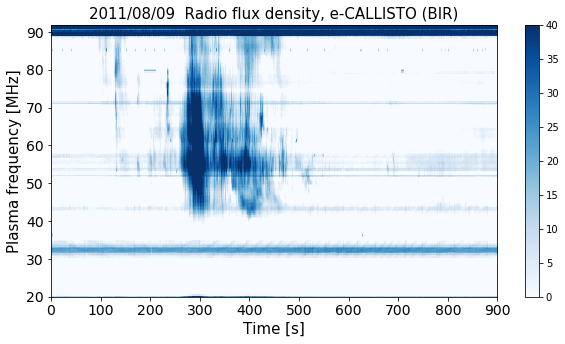

In [19]:
fig= plt.figure(figsize=(10,5))
extent = (time[0], time[-1], freqs[-1], freqs[0])
plt.imshow(data, aspect = 'auto', extent = extent, cmap='Blues', vmin=0,vmax=40)
# cm.PRGn, cm.hot, cm.cool, cm.bone, cm.binary, cm.spectral, cm.jet, cm.inferno
# cm.gnuplot, cm.gnuplot2, cm.CMRmap, cm.plasma, cm.magma
plt.tick_params(labelsize=14)
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Plasma frequency [MHz]',fontsize=15)
plt.title(Im_title, fontsize=15)
plt.colorbar()
plt.savefig(myfile + ".png")
plt.show()

In [20]:
bgs = data -  data.mean(axis=1, keepdims=True)  # subtract average

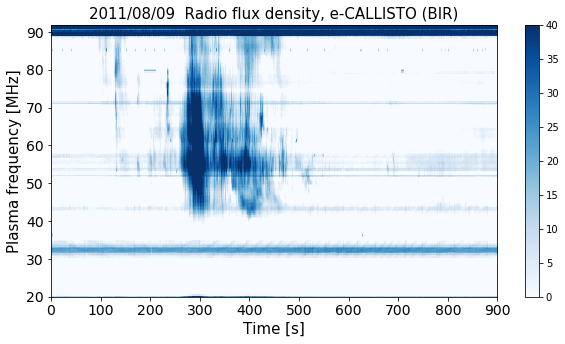

In [21]:
fig= plt.figure(figsize=(10,5))
extent = (time[0], time[-1], freqs[-1], freqs[0])
plt.imshow(data, aspect = 'auto', extent = extent, cmap='Blues', vmin=0,vmax=40)
# cm.PRGn, cm.hot, cm.cool, cm.bone, cm.binary, cm.spectral, cm.jet, cm.inferno
# cm.gnuplot, cm.gnuplot2, cm.CMRmap, cm.plasma, cm.magma
plt.tick_params(labelsize=14)
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Plasma frequency [MHz]',fontsize=15)
plt.title(Im_title, fontsize=15)
plt.colorbar()
plt.savefig(myfile + ".png")
plt.show()

In [22]:
timemarker=3000  # play with me
ref =  data[:,timemarker]
bgs = np.transpose(np.transpose(data) - ref)  # subtract average 

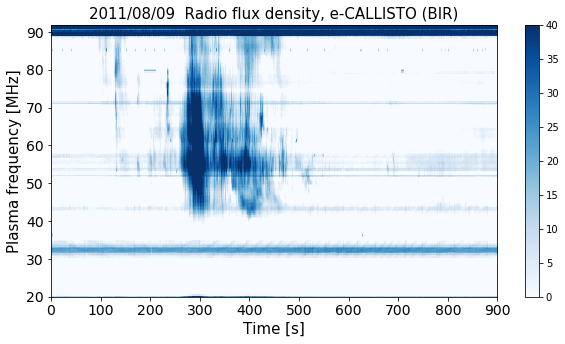

In [23]:
fig= plt.figure(figsize=(10,5))
extent = (time[0], time[-1], freqs[-1], freqs[0])
plt.imshow(data, aspect = 'auto', extent = extent, cmap='Blues', vmin=0,vmax=40)
# cm.PRGn, cm.hot, cm.cool, cm.bone, cm.binary, cm.spectral, cm.jet, cm.inferno
# cm.gnuplot, cm.gnuplot2, cm.CMRmap, cm.plasma, cm.magma
plt.tick_params(labelsize=14)
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Plasma frequency [MHz]',fontsize=15)
plt.title(Im_title, fontsize=15)
plt.colorbar()
plt.savefig(myfile + ".png")
plt.show()

### Plotting a histogram

To make a histogram with matplotlib.pyplot.hist(), I need to cast the data from a 2-D to array to something one dimensional.

In this case, I am using the iterable python object data.flat.

In [24]:
print(type(data.flat))

<type 'numpy.flatiter'>


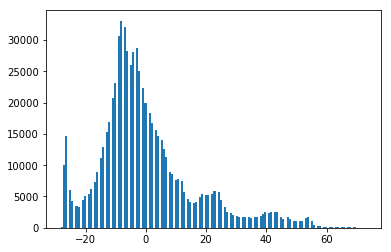

In [25]:
NBINS = 150
histogram = plt.hist(data.flat, NBINS)
plt.show()